In [1]:
import math
import numpy as np
import pandas as pd
import os
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
# change font
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## 0. Read Data

Fetal Health Classification Dataset: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

Original article: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6822315/

In [3]:
df_input = pd.read_csv(os.path.join(os.getcwd(), '..', 'data', 'fetal_health.csv'))
df_input.columns = [col.replace('_', ' ') for col in df_input.columns]
df_input

,baseline value,accelerations,fetal movement,uterine contractions,light decelerations,severe decelerations,prolongued decelerations,abnormal short term variability,mean value of short term variability,percentage of time with abnormal long term variability,mean value of long term variability,histogram width,histogram min,histogram max,histogram number of peaks,histogram number of zeroes,histogram mode,histogram mean,histogram median,histogram variance,histogram tendency,fetal health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [4]:
df_input.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal short term variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean value of short term variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage of time with abnormal long term variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


Fetal health (target column):
- 1 - Normal
- 2 - Suspect
- 3 - Pathological

In [5]:
df_input['fetal health'] = df_input['fetal health'].astype(int)

In [6]:
df_input['fetal health'].value_counts()

1    1655
2     295
3     176
Name: fetal health, dtype: int64

In [7]:
X = df_input[[col for col in df_input.columns if col not in ['fetal health']]]
y = df_input['fetal health']

In [8]:
classes_dict = {1:'Normal', 2:'Suspect', 3:'Pathological'}

## 1. EDA

Illustrative EDA example

<Figure size 1728x1728 with 0 Axes>

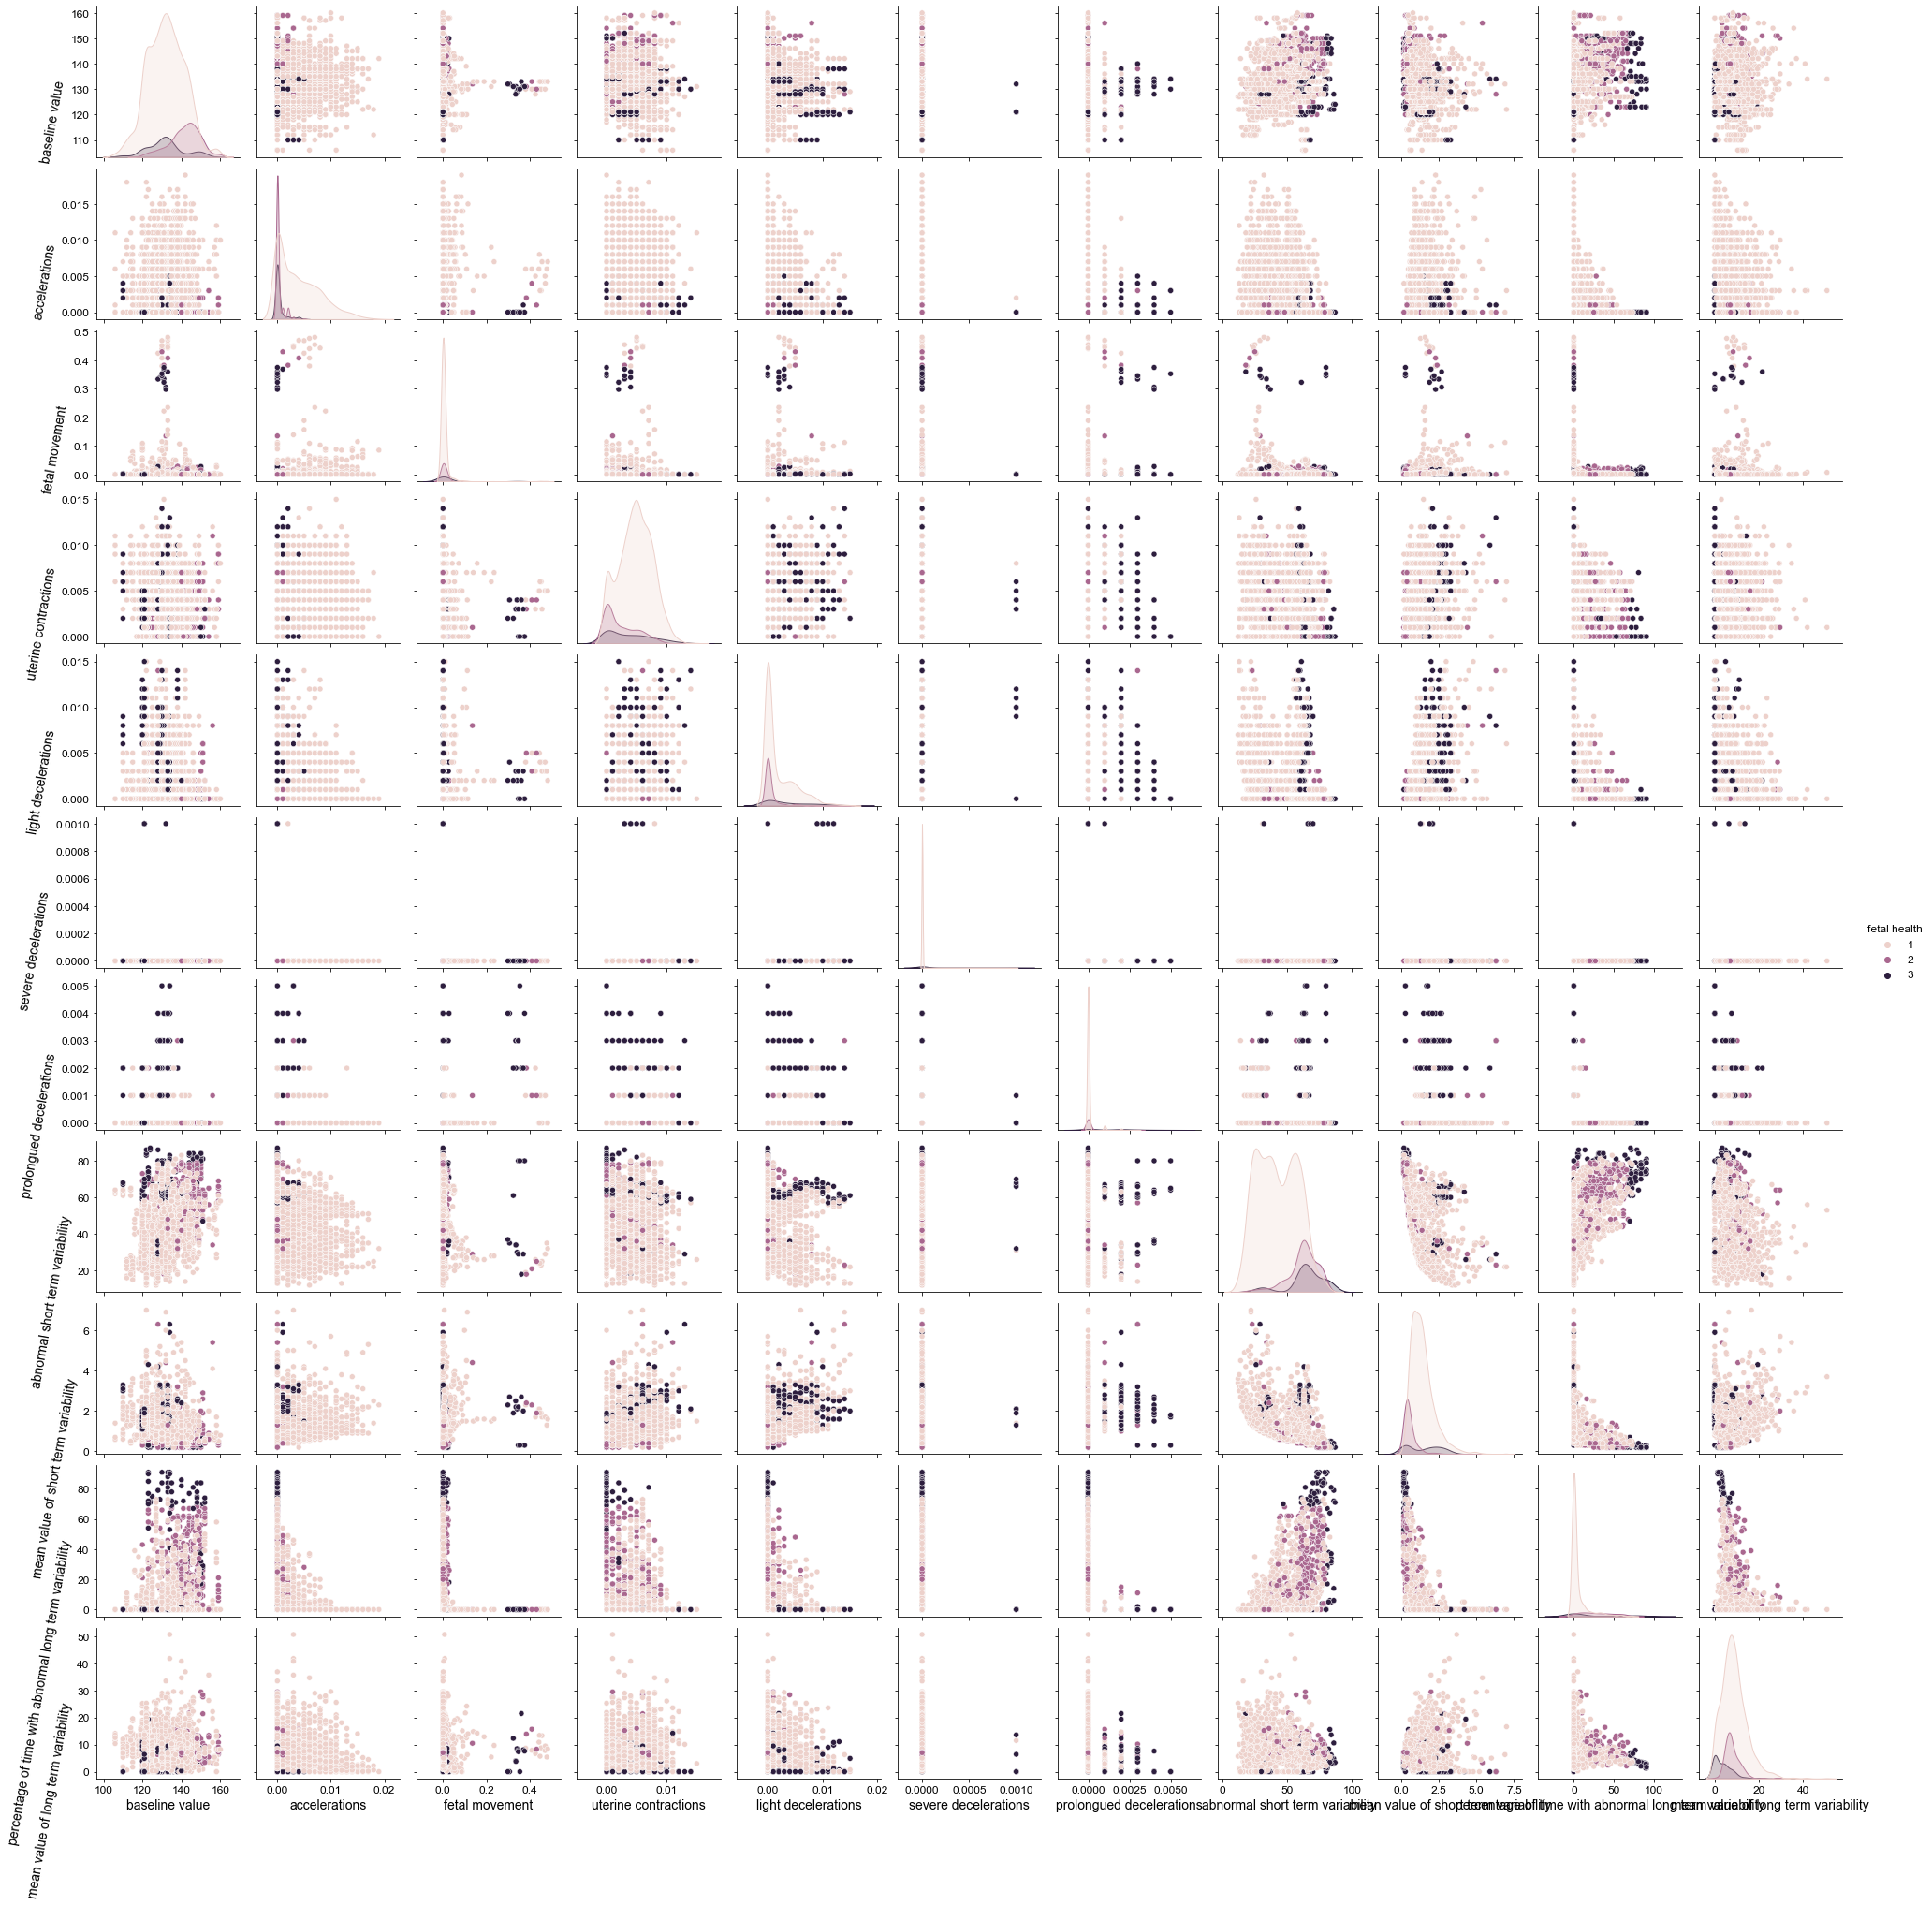

In [9]:
plt.figure(figsize=(24, 24))

plot_cols = [col for col in X.columns if not col.startswith('histogram')]
pairplot = sns.pairplot(pd.concat([X[plot_cols], y], axis=1), hue='fetal health')
# rotate y labels
for ax in pairplot.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation=0)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation=80)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

plt.show()

In [10]:
def plot_boxplots(X, y, features_to_plot):
    
    PLOTS_PER_ROW = 4
    with sns.axes_style("darkgrid"):
        fig, axes = plt.subplots(math.ceil(len(features_to_plot)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(22, 4*math.ceil(len(features_to_plot)/3)))
    fig.subplots_adjust(hspace=.3, wspace=.2)
    
    i, j = 0, 0
    
    for feature in features_to_plot:
        sns.boxplot(
            x=y.apply(lambda cell: classes_dict[cell]), y=X[feature], order=classes_dict.values(), ax=axes[i][j], palette="YlGnBu",
            medianprops=dict(linewidth=4, color="blue", alpha=1.0), flierprops=dict(markerfacecolor="#707070", marker="d"),
            showmeans=True, meanprops={"marker":"X","markerfacecolor":"limegreen", "markeredgecolor":"green" ,"markersize":10}
        )
        axes[i][j].set_title(feature, fontsize=MEDIUM_SIZE)
        axes[i][j].set_ylabel('', fontsize=SMALL_SIZE)
        axes[i][j].set_xlabel('', fontsize=SMALL_SIZE)

        j += 1
        if j % PLOTS_PER_ROW == 0:
            i += 1
            j = 0
            
    plt.show()

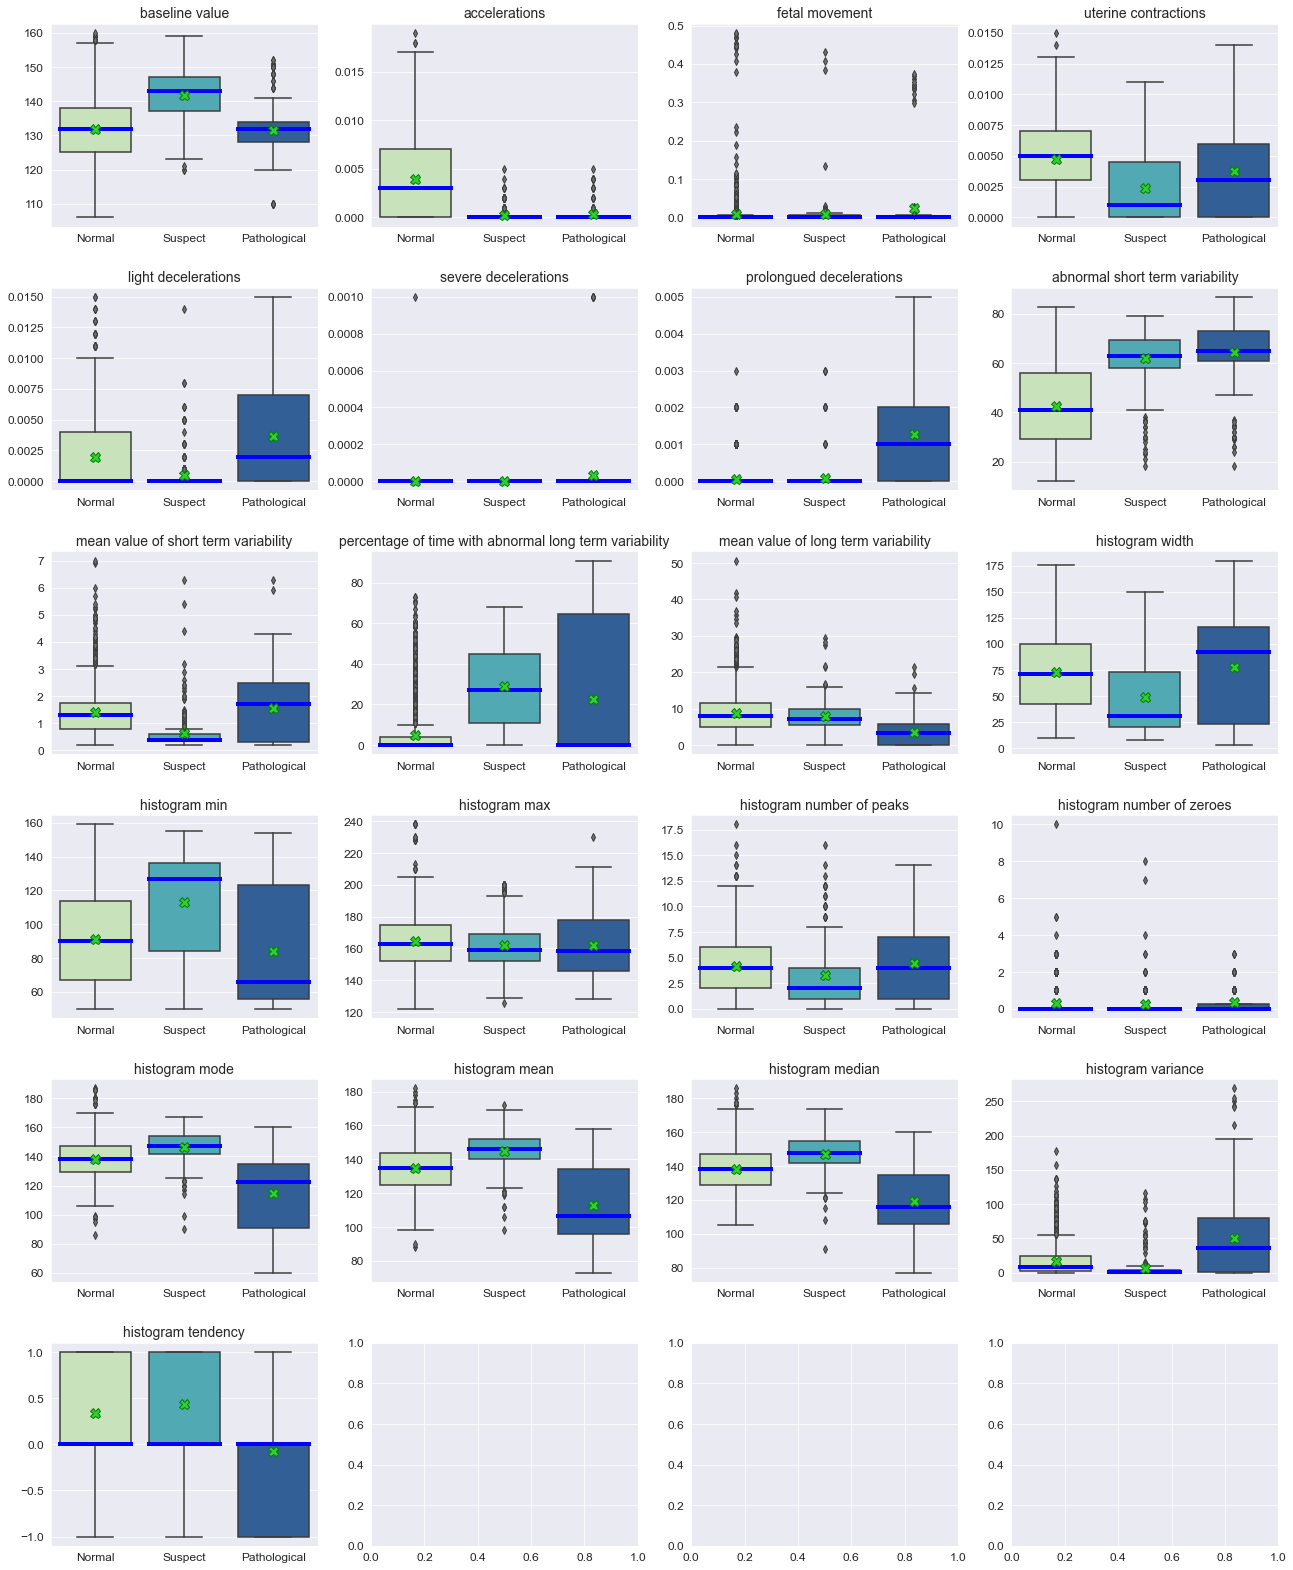

In [11]:
plot_boxplots(X, y, X.columns)

## 2. Correlation Analysis

### 2.1. Pearson's Correlation Coefficient

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
# Compute features' correlation
X_corr = X.corr()

# Generate a mask to onlyshow the bottom triangle
mask_corr = np.triu(np.ones_like(X_corr, dtype=bool))

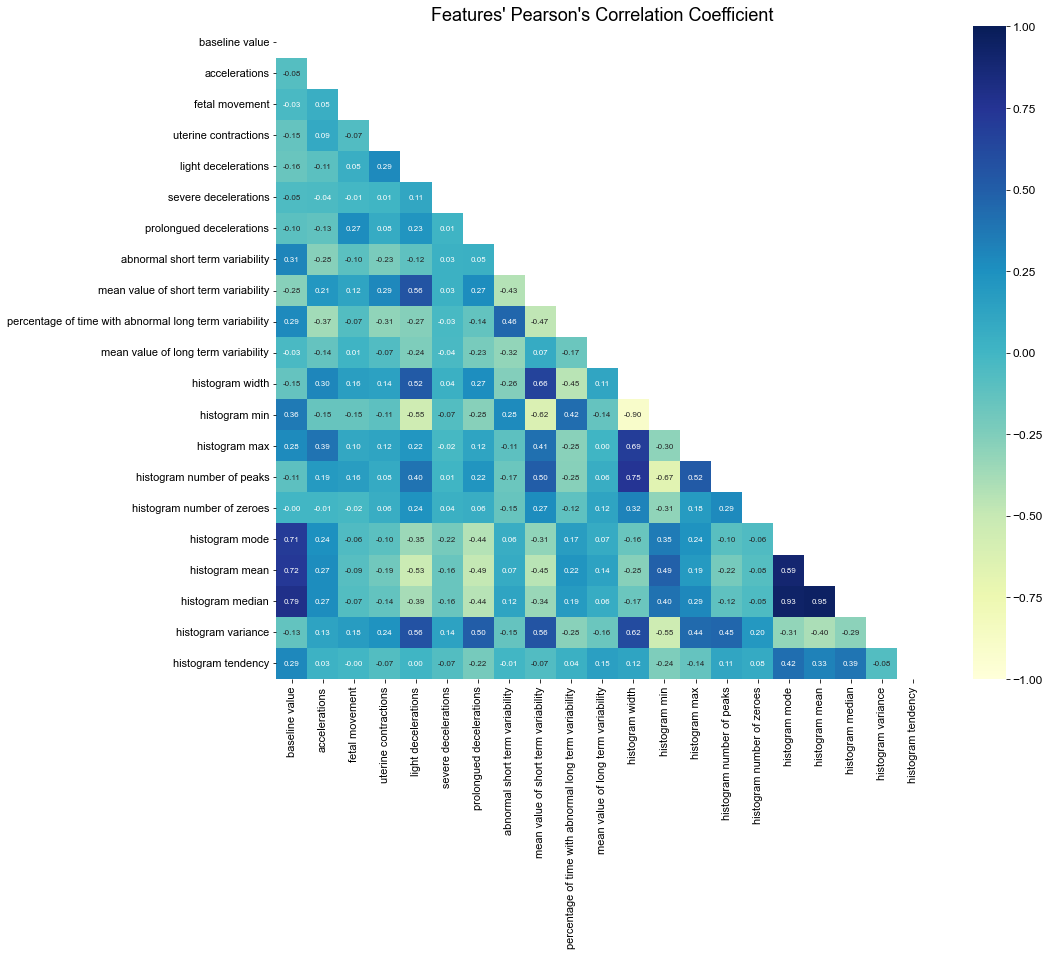

In [14]:
plt.figure(figsize=(16,12))
plt.title("Features' Pearson's Correlation Coefficient", fontsize=18)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# generate heatmap
sns.heatmap(X_corr, cmap="YlGnBu", annot=True, mask=mask_corr, vmin=-1, vmax=1, square=True, annot_kws={"fontsize":8}, fmt=".2f")

plt.show()

Most features do not appear to have strong positive or negative correlations with other features, but there are cases where correlation is high

### 2.2. Multicollinearity

> Multicollinearity is a problem because it undermines the statistical significance of an independent variable. [\[source\]](https://link.springer.com/chapter/10.1007/978-0-585-25657-3_37)

> Multicollinearity does not affect the accuracy of predictive models, including regression models. \[...\] Now, where multicollinearity becomes 'an issue' is when you want to 'interpret' the parameters learned by your model. In other words, you cannot say that the feature with the 'biggest weight' is 'the most important' when the features are correlated. Note that this is independent on the accuracy of the model, this is only the interpretation part [\[source\]](https://www.researchgate.net/post/Are-Random-Forests-affected-by-multi-collinearity-between-features)

> Multicollinearity is only a problem for inference in statistics and analysis. For example, if you’d like to infer the importance of certain features, then almost by definition multicollinearity means that some features are shown as strongly/perfectly correlated with other combination of features, and therefore they are undistinguishable. In this case, you can simply remove the problematic features.
Multicollinearity is not a real problem for prediction. GBT, being more of a black-box model, is more suitable for predictions problems to start with, although of course you could try and use them for inference as well.
[\[source\]](https://www.quora.com/Is-multicollinearity-a-problem-with-gradient-boosted-trees)



#### 2.2.1. Variance Inflation Factor (VIF)

Here’s the formula for calculating the VIF for feature X1: $VIF_{1}=\frac{1}{1-R_{1}^{2}}$

$R^2$ in this formula is the coefficient of determination from the linear regression model which has: X1 as dependent variable (target), and X2, X3, ... as independent variables (features). To calculate VIF for each features, you have to fit a linear regression using such feature as the target.

As a general rule of thumb, "VIF > 5 is cause for concern and VIF > 10 indicates a serious collinearity problem."

- If feature X1 has VIF = 1 (minimum possible value for VIF), then there is zero collinearity between this feature and the other features in the dataset (e.g. X2, X3, ...)
- If feature X1 has VIF = 2.5, then the variance of the regression coefficient of X1 in the original linear regression model is 2.5 times greater than it would have been if X1 had been entirely non-related to other features
- If feature X1 has VIF = Inf, then X1 can be perfectly predicted by using the other features in the dataset
[\[source\]](https://quantifyinghealth.com/vif-threshold/#:~:text=Most%20research%20papers%20consider%20a,of%205%20or%20even%202.5.)

The higher the VIF:
- The more correlated a predictor is with the other predictors
- The more the standard error is inflated
- The larger the confidence interval
- The less likely it is that a coefficient will be evaluated as statistically significant
[\[source\]](https://towardsdatascience.com/everything-you-need-to-know-about-multicollinearity-2f21f082d6dc)

For implementation example with evaluation on performance and feature importance, read [\[this article\]](https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b)

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
df_vif = pd.DataFrame(X.columns, columns=['feature'])
df_vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
df_vif = df_vif.sort_values('VIF', ascending=False)
df_vif

,feature,VIF
11,histogram width,inf
13,histogram max,inf
12,histogram min,inf
18,histogram median,2429.742819
17,histogram mean,1503.040984
0,baseline value,1058.823853
16,histogram mode,643.767283
7,abnormal short term variability,16.051631
8,mean value of short term variability,9.457023
14,histogram number of peaks,6.863768


**Which features would remain if we removed all features with VIF > 10?**

In [17]:
def check_vif(X, threshhold=10):
    features = list(X.columns)
    max_len = max([len(f) for f in features])
    high_vif_cols = []

    for i in range(len(features)):
        vif = [variance_inflation_factor(X[features].values, ix) for ix in range(X[features].shape[1])]
        max_idx = np.argmax(vif)
        if max(vif) > threshhold:
            high_vif_col = features.pop(max_idx)
            high_vif_cols.append(high_vif_col)
            print(f'{i+1}. Removed feature: {(high_vif_col+" ").ljust(max_len+2,".")} VIF: {vif[max_idx]:.2f}')

    print(f'\nRemaining features:\n{features}')
    
    return high_vif_cols

In [18]:
high_vif_cols = check_vif(X)

1. Removed feature: histogram width ........................................ VIF: inf
2. Removed feature: histogram median ....................................... VIF: 2429.74
3. Removed feature: histogram mean ......................................... VIF: 1150.25
4. Removed feature: baseline value ......................................... VIF: 576.70
5. Removed feature: histogram mode ......................................... VIF: 229.32
6. Removed feature: histogram max .......................................... VIF: 93.14
7. Removed feature: histogram min .......................................... VIF: 13.23

Remaining features:
['accelerations', 'fetal movement', 'uterine contractions', 'light decelerations', 'severe decelerations', 'prolongued decelerations', 'abnormal short term variability', 'mean value of short term variability', 'percentage of time with abnormal long term variability', 'mean value of long term variability', 'histogram number of peaks', 'histogram number of ze

__________

#### 2.2.2. Principal Component Analysis (PCA)

Principal Components Analysis (PCA) is a well-known unsupervised dimensionality reduction technique that constructs relevant features/variables through linear (linear PCA) or non-linear (kernel PCA) combinations of the original variables (features).

The construction of relevant features is achieved by linearly transforming correlated variables into a smaller number of uncorrelated variables. This is done by projecting (dot product) the original data into the reduced PCA space using the eigenvectors of the covariance/correlation matrix aka the principal components (PCs).

The resulting projected data are essentially linear combinations of the original data capturing most of the variance in the data.

[\[source\]](https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e)

Additional insighful article on multicollinearity and model interpretability: [\[source\]](https://marinawyss.github.io/multicollinearity/)

In [19]:
from sklearn.decomposition import PCA

In [20]:
# Standardize X
stdscaler = StandardScaler()
X_standardized = pd.DataFrame(stdscaler.fit_transform(X), columns=X.columns)

In [21]:
# use all possible PC's
pca_initial = PCA(n_components=X_standardized.shape[1])

pca_cols = [f'PC{i}' for i in range(1,X_standardized.shape[1]+1)]
# The PCA model requires standardized (z-scored) data
X_pca = pd.DataFrame(pca_initial.fit_transform(X_standardized), columns=pca_cols)

In [22]:
df_vif_pca = pd.DataFrame(pca_cols, columns=['PC'])
df_vif_pca['VIF'] = [variance_inflation_factor(X_pca, i) for i in range(X_pca.shape[1])]
df_vif_pca

,PC,VIF
0,PC1,1.0
1,PC2,1.0
2,PC3,1.0
3,PC4,1.0
4,PC5,1.0
5,PC6,1.0
6,PC7,1.0
7,PC8,1.0
8,PC9,1.0
9,PC10,1.0


In [23]:
df_vif_pca['VIF'].round(decimals=1).value_counts()

1.0    21
Name: VIF, dtype: int64

With PCA, we removed all the multicolinearity in the data

In [24]:
# Compute features' correlation
X_corr_pca = X_pca.corr()

# Generate a mask to onlyshow the bottom triangle
mask_corr_pca = np.triu(np.ones_like(X_corr_pca, dtype=bool))

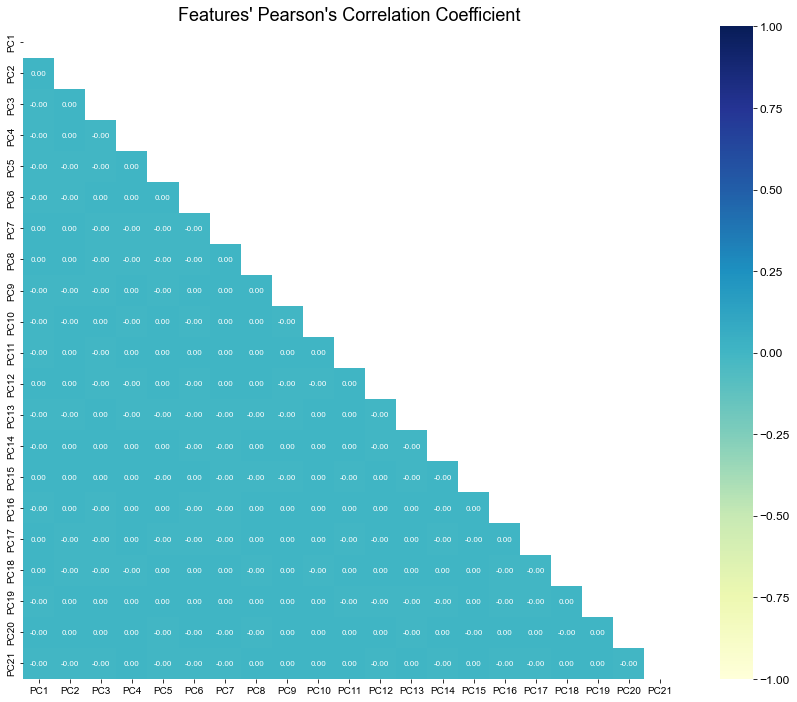

In [25]:
plt.figure(figsize=(16,12))
plt.title("Features' Pearson's Correlation Coefficient", fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# generate heatmap
sns.heatmap(X_corr_pca, cmap="YlGnBu", annot=True, mask=mask_corr_pca, vmin=-1, vmax=1, square=True, annot_kws={"fontsize":8}, fmt=".2f")

plt.show()

#### 2.2.3. PCA after train test split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, df_input.index, test_size=0.2, random_state=0)

In [28]:
y_train.value_counts()

1    1329
2     237
3     134
Name: fetal health, dtype: int64

In [29]:
# Standardize X_train
stdscaler = StandardScaler()
X_train_std = pd.DataFrame(stdscaler.fit_transform(X_train), columns=X.columns, index=idx_train)
X_test_std = pd.DataFrame(stdscaler.transform(X_test), columns=X.columns, index=idx_test)

In [30]:
# A) Select components that explain 90% of the variability in the original data
n_components = np.argmax(pca_initial.explained_variance_ratio_.cumsum() > 0.98) + 1
# B) use all PC's
# n_components = X.shape[1]

# use selected PC's
pca = PCA(n_components=n_components)

pca_cols = [f'PC{i}' for i in range(1,n_components+1)]
# The PCA model requires standardized (z-scored) data
X_train_pca = pd.DataFrame(pca.fit_transform(X_train_std), columns=pca_cols, index=idx_train)
X_test_pca = pd.DataFrame(pca.transform(X_test_std), columns=pca_cols, index=idx_test)
X_train_pca_coeffs = pd.DataFrame(pca.components_, index=pca_cols, columns=X.columns)

print(f"Number of Principal Components (PC's) used: {len(pca.explained_variance_ratio_)} (out of {X.shape[1]} possible PC's)")
print(f"Those {len(pca.explained_variance_ratio_)} PC's explain {pca.explained_variance_ratio_.sum()*100:.1f}% of the variance in the original data")

Number of Principal Components (PC's) used: 16 (out of 21 possible PC's)
Those 16 PC's explain 98.4% of the variance in the original data


## Auxiliar Functions' Definitions

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [32]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix
    
    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(7, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=BIGGER_SIZE, pad=20)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, ['\n'.join(name.rsplit(' ')) for name in target_names], rotation=0, fontsize=MEDIUM_SIZE)
        plt.yticks(tick_marks, ['\n'.join(name.rsplit(' ')) for name in target_names], fontsize=MEDIUM_SIZE)
        
    cm_copy = cm.copy()
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    thresh = cm_copy.max() / 1.5 if normalize else cm_copy.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.1f}%\n({})".format(cm[i, j]*100, cm_copy[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if cm_copy[i, j] > thresh else "black",
                     fontsize=MEDIUM_SIZE)
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if cm_copy[i, j] > thresh else "black",
                     fontsize=MEDIUM_SIZE)

    plt.tight_layout()
    plt.ylabel('True label', fontsize=MEDIUM_SIZE, labelpad=10)
    plt.xlabel('Predicted label\n\naccuracy={:.2f}%; misclassification={:.2f}%'.format(100*accuracy, 100*misclass), fontsize=MEDIUM_SIZE, labelpad=15)
    plt.show()

In [33]:
def gridsearch_cv(X_train_, y_train_, model, space, n_splits, n_repeats,
                  scoring=['accuracy', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'precision_macro',
                           'precision_weighted', 'recall_macro', 'recall_weighted', 'f1_macro', 'f1_weighted'], refit='f1_weighted', random_state=0):
    # ignore warnings via env var because GridSearchCV with n_jobs=-1 triggers parallel backend warnings
    os.environ['PYTHONWARNINGS'] = 'ignore'
    # define evaluation
    cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)
    # define search
    search = GridSearchCV(model, space, scoring=scoring, n_jobs=-1, cv=cv, refit=refit)
    # execute search
    result_cv = search.fit(X_train_, y_train_)
    
    return result_cv

Function to calculate p-values for scikit learn Logistic Regression model.

Source: https://stackoverflow.com/a/47079198

In [34]:
# Source: https://stackoverflow.com/questions/25122999/scikit-learn-how-to-check-coefficients-significance/47079198#47079198
from scipy.stats import norm

def logit_stderror(x, y_pred_proba_, coefficients, intercept):

    p = np.concatenate([(1-y_pred_proba_).reshape(y_pred_proba_.shape[0],1), y_pred_proba_.reshape(y_pred_proba_.shape[0],1)], axis=1)
    n = len(p)
    m = len(coefficients) + 1
    coefs = np.concatenate([[intercept], coefficients])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis=1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i,0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se
    p = (1 - norm.cdf(abs(t))) * 2
    
    return se

In [35]:
import matplotlib.patches as mpatches

def plot_importance(df_importance, classes_dict, title):
    
    idx_order = df_importance.index

    colors_dict = {
        'Positive': 'royalblue',
        'Negative': 'firebrick'
    }
    
    for c, class_name in classes_dict.items():
        df_importance[f'{class_name} - Abs Coeffs'] = df_importance[class_name].abs()
        df_importance[f'{class_name} - Color'] = df_importance.apply(
            lambda row: colors_dict['Negative'] if row[class_name] < 0 else colors_dict['Positive'], axis=1
        )
    
    
    PLOTS_PER_ROW = 2
    n_rows = math.ceil(len(classes_dict.keys())/PLOTS_PER_ROW)
    fig, axes = plt.subplots(n_rows, PLOTS_PER_ROW, figsize=(20, n_rows*df_importance.shape[0]/2))
    
    
    i, j = 0, 0
    
    for c, class_name in classes_dict.items():
        
        ax = axes[i][j]
        
        max_coeff = df_importance[f'{class_name} - Abs Coeffs'].max()
        big_errors = []
        error = df_importance[f'{class_name} - Std Error'].copy() * 1.96 # x1.96 to get 95% CI
        for idx, err in df_importance[f'{class_name} - Std Error'].iteritems():
            if err > max_coeff:
                big_errors.append((idx, err))
                error.loc[idx] = max_coeff

        df_importance = df_importance.sort_values(f'{class_name} - Abs Coeffs', ascending=True)
        df_importance[f'{class_name} - Abs Coeffs'].plot(
            kind="barh", color=df_importance[f'{class_name} - Color'], legend=False, ax=ax, 
            xerr=error.reindex(df_importance.index), ecolor='black', error_kw={'label':'95% confidence interval', 'capsize':4, 'capthick':1}
        )
        
        for idx_err, big_err in big_errors:
            display_string = f"  ...  (95% CI = ±{big_err:,.2f})"
            ax.text(df_importance[f'{class_name} - Abs Coeffs'].loc[idx_err] + max_coeff, df_importance[f'{class_name} - Std Error'].index.get_loc(idx_err)-0.025,
                display_string, color='black', fontweight='bold')
            
        
        ax.xaxis.grid()
        ax.set_axisbelow(True)
        legend_patches = [
            ax.get_legend_handles_labels()[0][0], # confidence interval
            mpatches.Patch(color=colors_dict['Positive'], label='Positive Coefficient'),
            mpatches.Patch(color=colors_dict['Negative'], label='Negative Coefficient'),
        ]
        ax.legend(handles=legend_patches, loc='upper right', bbox_to_anchor=(1, 1.13),
                  ncol=1, fancybox=True, shadow=False)
        
        ax.set_title(f'Coefficients for "{class_name}" Class', fontsize=MEDIUM_SIZE)
        ax.set_ylabel('', fontsize=SMALL_SIZE)
        ax.set_xlabel('', fontsize=SMALL_SIZE)

        j += 1
        if j % PLOTS_PER_ROW == 0:
            i += 1
            j = 0
    
    fig.suptitle(title, fontsize=BIGGER_SIZE, y=1.005)
    fig.tight_layout()
    fig.subplots_adjust(hspace=.2)
    plt.show()
    
    return df_importance[np.concatenate([[class_name, f'{class_name} - Abs Coeffs', f'{class_name} - Std Error'] for class_name in classes_dict.values()])].reindex(idx_order)

In [36]:
def print_metrics_cv(result_cv):
    print('Grid Search CV Best Model - Scoring Metrics:\n')
    
    print(f"ROC AUC One-vs-Rest macro:    {result_cv.cv_results_['mean_test_roc_auc_ovr'][result_cv.best_index_]:.3f}")
    print(f"ROC AUC One-vs-One  macro:    {result_cv.cv_results_['mean_test_roc_auc_ovo'][result_cv.best_index_]:.3f}")
    print(f"ROC AUC One-vs-Rest weighted: {result_cv.cv_results_['mean_test_roc_auc_ovr_weighted'][result_cv.best_index_]:.3f}")
    print(f"ROC AUC One-vs-One  weighted: {result_cv.cv_results_['mean_test_roc_auc_ovo_weighted'][result_cv.best_index_]:.3f}\n")
    print(f"Accuracy:           {result_cv.cv_results_['mean_test_accuracy'][result_cv.best_index_]:.3f}\n")
    print(f"Precision macro:    {result_cv.cv_results_['mean_test_precision_macro'][result_cv.best_index_]:.3f}")
    print(f"Recall    macro:    {result_cv.cv_results_['mean_test_recall_macro'][result_cv.best_index_]:.3f}")
    print(f"F1 score  macro:    {result_cv.cv_results_['mean_test_f1_macro'][result_cv.best_index_]:.3f}\n")
    print(f"Precision weighted: {result_cv.cv_results_['mean_test_precision_weighted'][result_cv.best_index_]:.3f}")
    print(f"Recall    weighted: {result_cv.cv_results_['mean_test_recall_weighted'][result_cv.best_index_]:.3f} (= accuracy)")
    print(f"F1 score  weighted: {result_cv.cv_results_['mean_test_f1_weighted'][result_cv.best_index_]:.3f}\n\n")

    print(f'\nBest Hyperparameters: {result_cv.best_params_}\n\n')

In [37]:
def print_metrics(y_test_, y_pred_, y_pred_proba_):
    print('Final Model - Scoring Metrics on Test Dataset:\n')
    print(f"ROC AUC One-vs-Rest macro:    {roc_auc_score(y_test_, y_pred_proba_, multi_class='ovr', average='macro'):.3f}")
    print(f"ROC AUC One-vs-One  macro:    {roc_auc_score(y_test_, y_pred_proba_, multi_class='ovo', average='macro'):.3f}")
    print(f"ROC AUC One-vs-Rest weighted: {roc_auc_score(y_test_, y_pred_proba_, multi_class='ovr', average='weighted'):.3f}")
    print(f"ROC AUC One-vs-One  weighted: {roc_auc_score(y_test_, y_pred_proba_, multi_class='ovo', average='weighted'):.3f}\n")
    print(f"Accuracy:           {accuracy_score(y_test_, y_pred_):.3f}\n")
    print(f"Precision macro:    {precision_score(y_test_, y_pred_, average='macro'):.3f}")
    print(f"Recall    macro:    {recall_score(y_test_, y_pred_, average='macro'):.3f}")
    print(f"F1 score  macro:    {f1_score(y_test_, y_pred_, average='macro'):.3f}\n")
    print(f"Precision weighted: {precision_score(y_test_, y_pred_, average='weighted'):.3f}")
    print(f"Recall    weighted: {recall_score(y_test_, y_pred_, average='weighted'):.3f} (= accuracy)")
    print(f"F1 score  weighted: {f1_score(y_test_, y_pred_, average='weighted'):.3f}\n\n")
    print('Classification Report: \n')
    print(classification_report(y_test_, y_pred_))

## 3. Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
y_train.value_counts()

1    1329
2     237
3     134
Name: fetal health, dtype: int64

In [40]:
space_logreg = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'C': np.logspace(-5, 2, num=15, base=10.0), # 10e-5 to 100 in 15 steps
    'class_weight': ['balanced'],
    'multi_class': ['multinomial', 'ovr']
}

### 3.1. Logistic Regression on PC's

In [50]:
%%time
# Hyperparameter tuning with Grid Search Cross Validation

result_cv_logreg_pca = gridsearch_cv(X_train_pca, y_train, model=LogisticRegression(), space=space_logreg, n_splits=4, n_repeats=2, random_state=0,
                                     scoring=['accuracy', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'precision_macro',
                                              'precision_weighted', 'recall_macro', 'recall_weighted', 'f1_macro', 'f1_weighted'], refit='f1_weighted')
result_cv_logreg_pca

CPU times: user 1.13 s, sys: 120 ms, total: 1.25 s
Wall time: 10.7 s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=4, random_state=0),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 3.16227766e-05, 1.00000000e-04, 3.16227766e-04,
       1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+...
                         'class_weight': ['balanced'],
                         'multi_class': ['multinomial', 'ovr'],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             refit='f1_weighted',
             scoring=['accuracy', 'roc_auc_ovr', 'roc_auc_ovr_weighted',
                      'roc_auc_ovo', 'roc_auc_ovo_weighted', 'precision_macro',
                      'precision_weighted', 'recall_macro', 'recall_weighted',
                      'f1_macro', 'f1_weighted'])

In [51]:
print_metrics_cv(result_cv_logreg_pca)

Grid Search CV Best Model - Scoring Metrics:

ROC AUC One-vs-Rest macro:    0.962
ROC AUC One-vs-One  macro:    0.949
ROC AUC One-vs-Rest weighted: 0.966
ROC AUC One-vs-One  weighted: 0.962

Accuracy:           0.890

Precision macro:    0.781
Recall    macro:    0.841
F1 score  macro:    0.807

Precision weighted: 0.905
Recall    weighted: 0.890 (= accuracy)
F1 score  weighted: 0.895



Best Hyperparameters: {'C': 1.0, 'class_weight': 'balanced', 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}




In [52]:
# define best model
model_logreg_pca = LogisticRegression(
    **result_cv_logreg_pca.best_params_, random_state=0
)

In [53]:
# Fit model and make predictions
model_logreg_pca.fit(X_train_pca, y_train)
y_pred_pca = model_logreg_pca.predict(X_test_pca)
y_pred_proba_pca = model_logreg_pca.predict_proba(X_test_pca)
print(f'Accuracy on Training Set: {100*model_logreg_pca.score(X_train_pca, y_train):.1f}%')
print(f'Accuracy on Test Set:     {100*model_logreg_pca.score(X_test_pca, y_test):.1f}%')

Accuracy on Training Set: 89.6%
Accuracy on Test Set:     86.2%


In [54]:
print_metrics(y_test, y_pred_pca, y_pred_proba_pca)

Final Model - Scoring Metrics on Test Dataset:

ROC AUC One-vs-Rest macro:    0.950
ROC AUC One-vs-One  macro:    0.933
ROC AUC One-vs-Rest weighted: 0.954
ROC AUC One-vs-One  weighted: 0.949

Accuracy:           0.862

Precision macro:    0.745
Recall    macro:    0.799
F1 score  macro:    0.769

Precision weighted: 0.874
Recall    weighted: 0.862 (= accuracy)
F1 score  weighted: 0.866


Classification Report: 

              precision    recall  f1-score   support

           1       0.95      0.90      0.92       326
           2       0.58      0.69      0.63        58
           3       0.71      0.81      0.76        42

    accuracy                           0.86       426
   macro avg       0.75      0.80      0.77       426
weighted avg       0.87      0.86      0.87       426



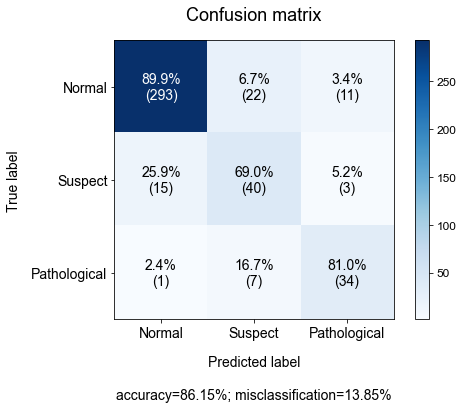

In [55]:
# Confusion Matrix
cm_pca = confusion_matrix(y_test, y_pred_pca)
plot_confusion_matrix(cm_pca, target_names=[classes_dict[i] for i in model_logreg_pca.classes_])

In [56]:
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           1       0.95      0.90      0.92       326
           2       0.58      0.69      0.63        58
           3       0.71      0.81      0.76        42

    accuracy                           0.86       426
   macro avg       0.75      0.80      0.77       426
weighted avg       0.87      0.86      0.87       426



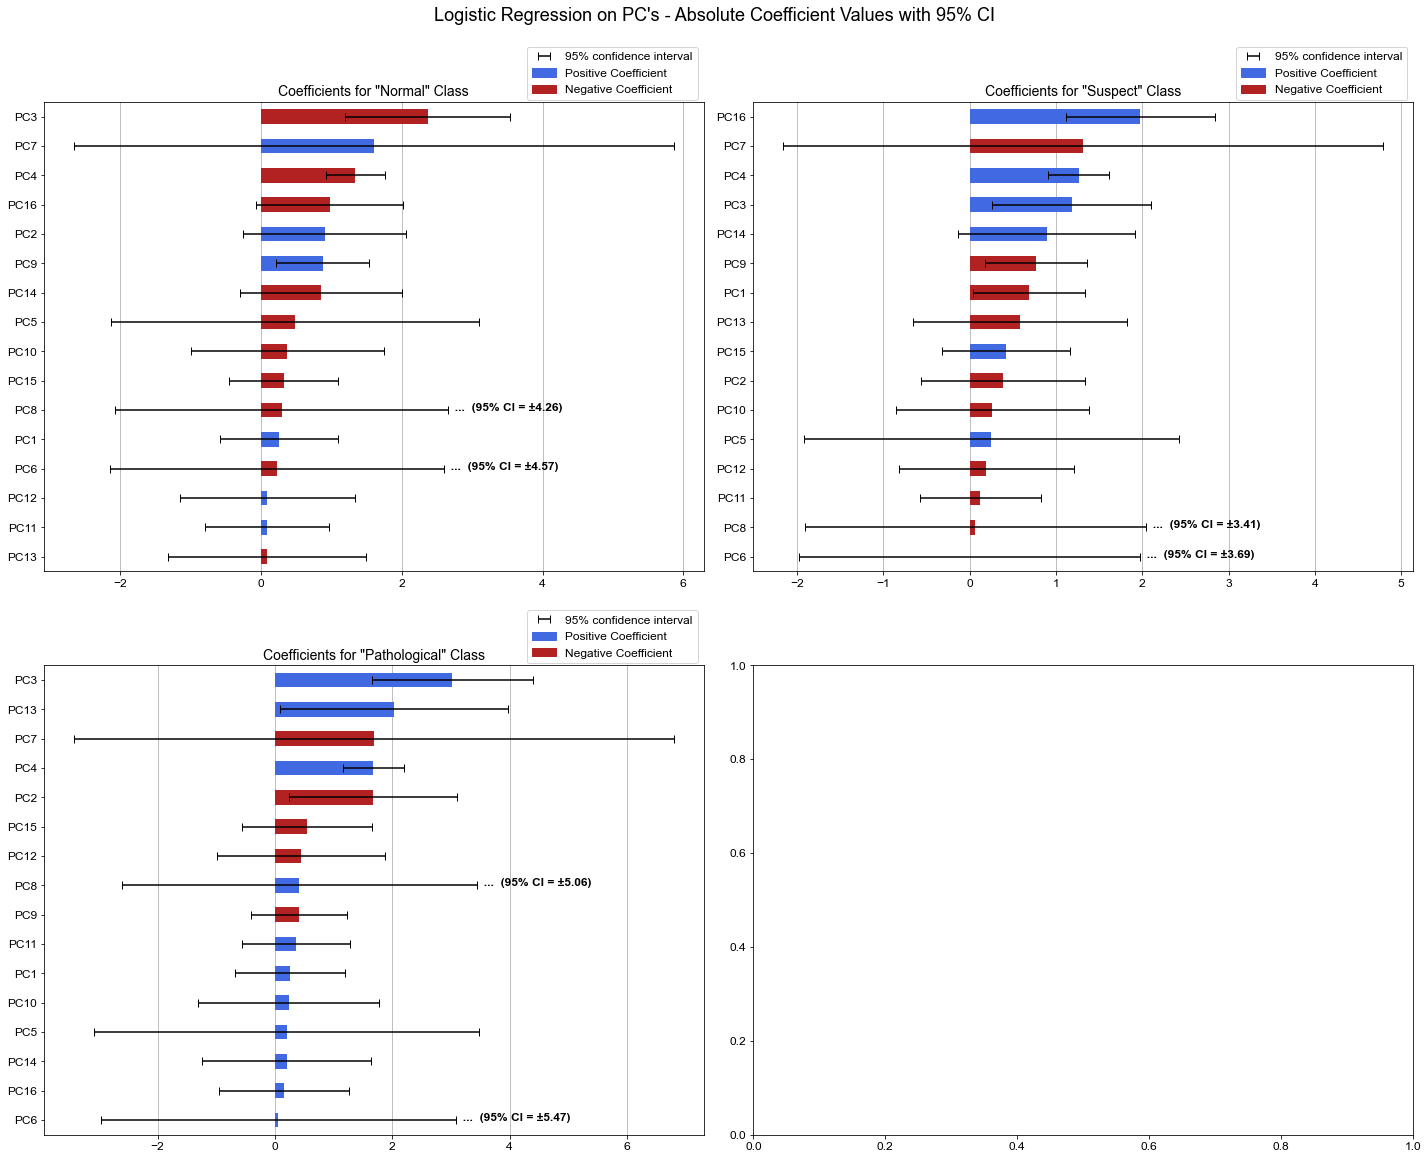

In [57]:
df_importance_components_pca = pd.DataFrame(np.transpose(model_logreg_pca.coef_), columns=[classes_dict[i] for i in model_logreg_pca.classes_], index=pca_cols)
for i, c in enumerate(model_logreg_pca.classes_):
    df_importance_components_pca[f'{classes_dict[c]} - Std Error'] = logit_stderror(X_train_pca, y_pred_proba_pca[:,i], 
                                                                               df_importance_components_pca[classes_dict[c]].values, model_logreg_pca.intercept_[i])[1:]
df_importance_components_pca = plot_importance(df_importance_components_pca, classes_dict,
                                               title="Logistic Regression on PC's - Absolute Coefficient Values with 95% CI")

CI for the coefficients of the original features is the square root of the sum of the squares of the radius of the CI for the coefficients of the principal components.

Sources:
- Stack Exchange: https://stats.stackexchange.com/a/224760
- Uncertainties and Error Propagation: https://www.geol.lsu.edu/jlorenzo/geophysics/uncertainties/Uncertaintiespart2.html
- Error Propagation (Propagation of Uncertainty): https://www.statisticshowto.com/statistics-basics/error-propagation/

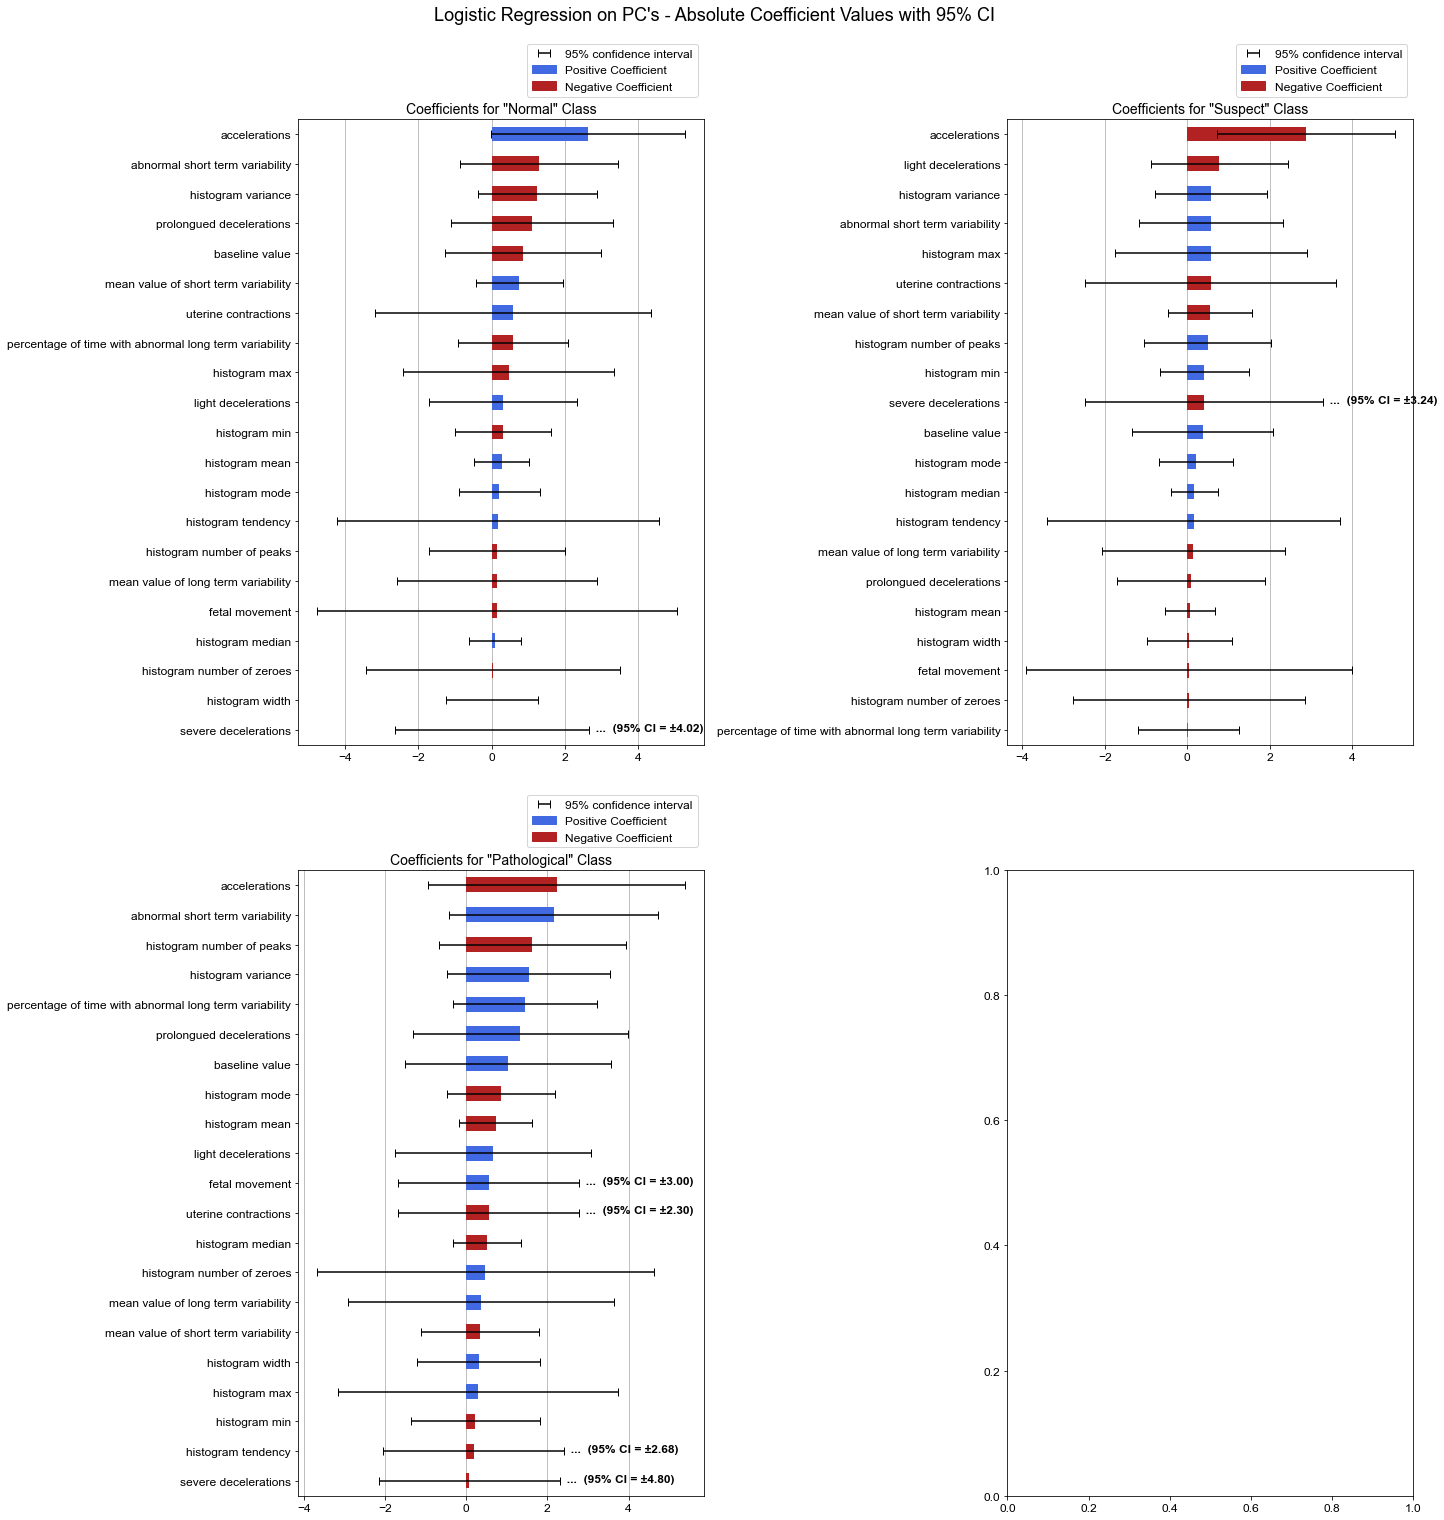

In [58]:
lst_importance_pca = []
for c, class_name in classes_dict.items():
    lst_importance_pca.append(X_train_pca_coeffs.multiply(df_importance_components_pca[class_name], axis='index'
                                                         ).sum(axis=0).to_frame(name=class_name))
    # Source: https://stats.stackexchange.com/questions/223924/how-to-add-up-partial-confidence-intervals-to-create-a-total-confidence-interval
    lst_importance_pca.append(np.sqrt((X_train_pca_coeffs.multiply(df_importance_components_pca[f'{class_name} - Std Error'], axis='index'
                                                          )**2).sum(axis=0)).to_frame(name=f'{class_name} - Std Error'))
    
df_importance_pca = pd.concat(lst_importance_pca, axis=1)

df_importance_pca = plot_importance(df_importance_pca, classes_dict, title="Logistic Regression on PC's - Absolute Coefficient Values with 95% CI")

### 3.2. Logistic Regression on original dataset

In [41]:
# remove high-VIF columns

# X_train_std = X_train_std[[col for col in X_train_std.columns if col not in high_vif_cols]]
# X_test_std = X_test_std[[col for col in X_test_std.columns if col not in high_vif_cols]]

In [42]:
%%time
# Hyperparameter tuning with Grid Search Cross Validation

result_cv_logreg = gridsearch_cv(X_train_std, y_train, model=LogisticRegression(), space=space_logreg, n_splits=4, n_repeats=2, random_state=0,
                                     scoring=['accuracy', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'precision_macro',
                                              'precision_weighted', 'recall_macro', 'recall_weighted', 'f1_macro', 'f1_weighted'], refit='f1_weighted')
result_cv_logreg

CPU times: user 995 ms, sys: 190 ms, total: 1.18 s
Wall time: 18.4 s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=4, random_state=0),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 3.16227766e-05, 1.00000000e-04, 3.16227766e-04,
       1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+...
                         'class_weight': ['balanced'],
                         'multi_class': ['multinomial', 'ovr'],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             refit='f1_weighted',
             scoring=['accuracy', 'roc_auc_ovr', 'roc_auc_ovr_weighted',
                      'roc_auc_ovo', 'roc_auc_ovo_weighted', 'precision_macro',
                      'precision_weighted', 'recall_macro', 'recall_weighted',
                      'f1_macro', 'f1_weighted'])

In [43]:
print_metrics_cv(result_cv_logreg)

Grid Search CV Best Model - Scoring Metrics:

ROC AUC One-vs-Rest macro:    0.963
ROC AUC One-vs-One  macro:    0.948
ROC AUC One-vs-Rest weighted: 0.967
ROC AUC One-vs-One  weighted: 0.962

Accuracy:           0.891

Precision macro:    0.780
Recall    macro:    0.838
F1 score  macro:    0.805

Precision weighted: 0.905
Recall    weighted: 0.891 (= accuracy)
F1 score  weighted: 0.896



Best Hyperparameters: {'C': 0.31622776601683794, 'class_weight': 'balanced', 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}




In [44]:
# define best model
model_logreg = LogisticRegression(
    **result_cv_logreg.best_params_, random_state=0
)

In [45]:
# Fit model and make predictions
model_logreg.fit(X_train_std, y_train)
y_pred = model_logreg.predict(X_test_std)
y_pred_proba = model_logreg.predict_proba(X_test_std)
print(f'Accuracy on Training Set: {100*model_logreg.score(X_train_std, y_train):.1f}%')
print(f'Accuracy on Test Set:     {100*model_logreg.score(X_test_std, y_test):.1f}%')

Accuracy on Training Set: 89.6%
Accuracy on Test Set:     87.8%


In [46]:
print_metrics(y_test, y_pred, y_pred_proba)

Final Model - Scoring Metrics on Test Dataset:

ROC AUC One-vs-Rest macro:    0.955
ROC AUC One-vs-One  macro:    0.938
ROC AUC One-vs-Rest weighted: 0.958
ROC AUC One-vs-One  weighted: 0.953

Accuracy:           0.878

Precision macro:    0.779
Recall    macro:    0.830
F1 score  macro:    0.802

Precision weighted: 0.890
Recall    weighted: 0.878 (= accuracy)
F1 score  weighted: 0.882


Classification Report: 

              precision    recall  f1-score   support

           1       0.95      0.91      0.93       326
           2       0.60      0.72      0.66        58
           3       0.78      0.86      0.82        42

    accuracy                           0.88       426
   macro avg       0.78      0.83      0.80       426
weighted avg       0.89      0.88      0.88       426



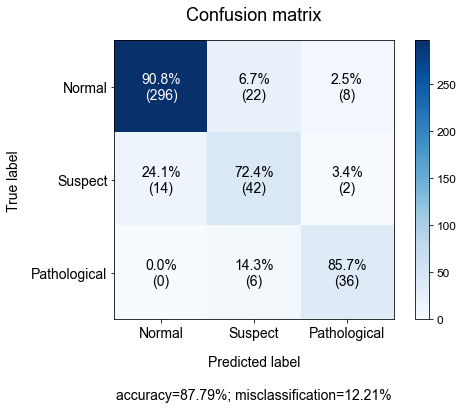

In [47]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, target_names=[classes_dict[i] for i in model_logreg.classes_])

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.91      0.93       326
           2       0.60      0.72      0.66        58
           3       0.78      0.86      0.82        42

    accuracy                           0.88       426
   macro avg       0.78      0.83      0.80       426
weighted avg       0.89      0.88      0.88       426



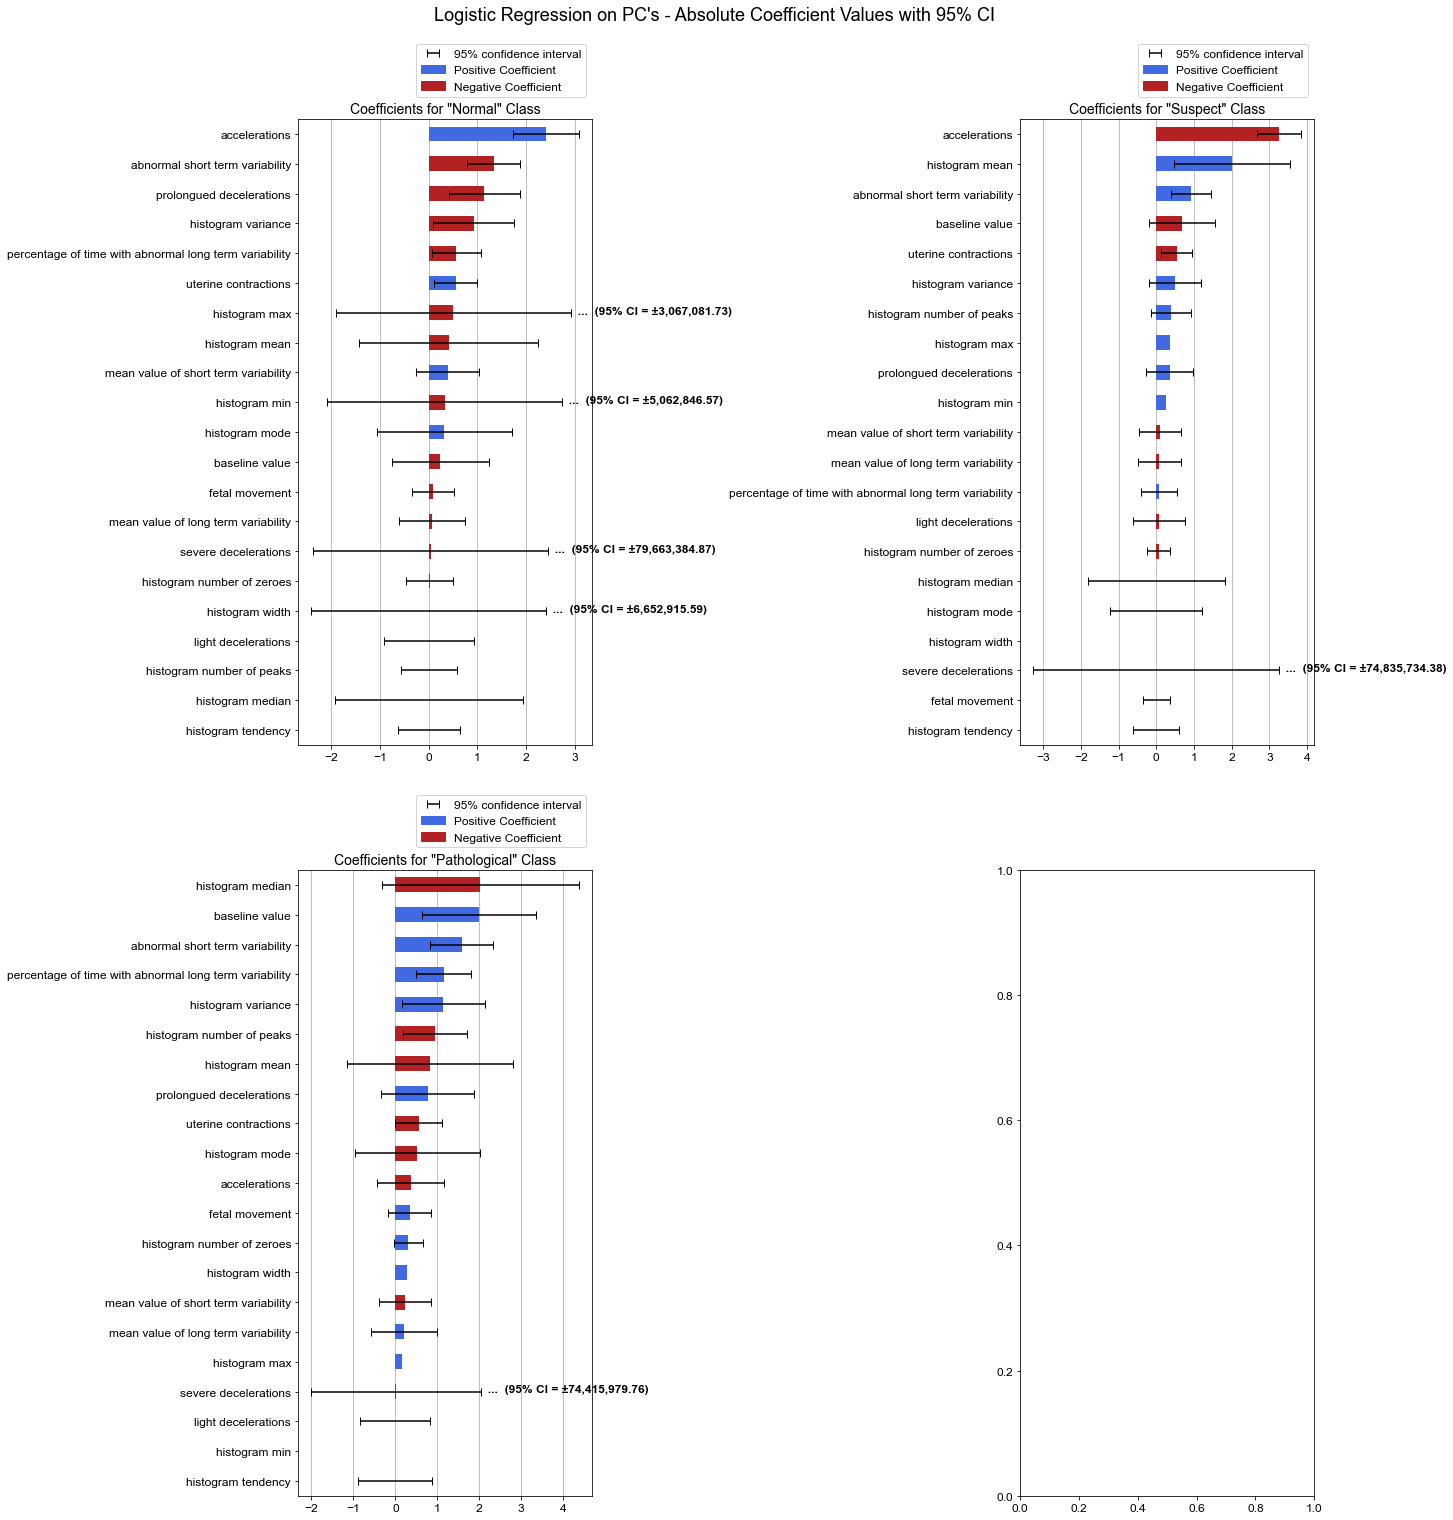

In [49]:
df_importance = pd.DataFrame(np.transpose(model_logreg.coef_), columns=[classes_dict[i] for i in model_logreg.classes_], index=X_train_std.columns)
for i, c in enumerate(model_logreg.classes_):
    df_importance[f'{classes_dict[c]} - Std Error'] = logit_stderror(X_train_std, y_pred_proba[:,i], 
                                                                     df_importance[classes_dict[c]].values, model_logreg.intercept_[i])[1:]
df_importance = plot_importance(df_importance, classes_dict, title="Logistic Regression on PC's - Absolute Coefficient Values with 95% CI")

## 4. XGBoost Classifier

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
import shap

In [ ]:
y_train.value_counts()

In [ ]:
neg_class_odds = y_train[y_train == 0].count() / y_train[y_train == 1].count()
neg_class_odds = neg_class_odds.iloc[0]
neg_class_odds

XGBoost parameter explanation: https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook

In [ ]:
space_xgb = {
    'objective': ['binary:logistic'],
    'n_estimators': [40, 50, 60],
    'learning_rate': [0.1],
    'max_depth': [4, 5, 6],
    'min_child_weight': [2, 3, 4],
    'gamma': [0, 0.25, 0.5],
    'alpha':[0, 0.15, 0.3],
    # ratio of number of negative class to the positive class (sum(negative instances) / sum(positive instances))
    'scale_pos_weight': [neg_class_odds],
    'eval_metric': ['logloss'],
    'lambda':[1, 1.25],
    ## 'subsample': [0.8, 1.0],
    ## 'colsample_bytree': [0.8, 1.0],
}

### 4.1. XGBoost on PC's

In [ ]:
%%time
# Hyperparameter tuning with Grid Search Cross Validation

result_cv_xgb_pca = gridsearch_cv(X_train_pca, y_train, model=XGBClassifier(), 
                                 space=space_xgb, n_splits=4, n_repeats=1, refit='f1', random_state=0)
result_cv_xgb_pca

In [ ]:
print_metrics_cv(result_cv_xgb_pca)

In [ ]:
# define best model
model_xgb_pca = XGBClassifier(
    **result_cv_xgb_pca.best_params_, random_state=0
)

In [ ]:
# Fit model and make predictions
model_xgb_pca.fit(X_train_pca, y_train)
y_pred_pca = model_xgb_pca.predict(X_test_pca)
y_pred_proba_pca = model_xgb_pca.predict_proba(X_test_pca)
print(f'Accuracy on Training Set: {100*model_xgb_pca.score(X_train_pca, y_train):.1f}%')
print(f'Accuracy on Test Set:     {100*model_xgb_pca.score(X_test_pca, y_test):.1f}%')

In [ ]:
print_metrics(y_test, y_pred_pca)

In [ ]:
# Confusion Matrix
cm_pca = confusion_matrix(y_test, y_pred_pca)
plot_confusion_matrix(cm_pca, target_names=[classes_dict[i] for i in model_xgb_pca.classes_])

**SHAP Analysis**

In [ ]:
explainer = shap.TreeExplainer(model_xgb_pca)
shap_values_pca = explainer.shap_values(X_test_pca)

In [ ]:
plt.title('Feature Importance', fontsize=BIGGER_SIZE)
shap.summary_plot(shap_values_pca, X_test_pca, plot_type="bar", class_names=[classes_dict[i] for i in model_xgb_pca.classes_],
                  max_display=X_test_pca.shape[1], plot_size=(8,X_test_pca.shape[1]/2.5))

In [ ]:
df_shap_pca = pd.DataFrame(shap_values_pca, columns=X_test_pca.columns)
df_importance_pca = df_shap_pca.T.abs().mean(axis=1).to_frame(name='mean(|SHAP|)')

# df_importance_pca.sort_values('mean(|SHAP|)', ascending=False)

In [ ]:
shap_values = np.dot(shap_values_pca, X_train_pca_coeffs.values)

In [ ]:
df_shap = pd.DataFrame(shap_values, columns=X.columns)
df_importance = df_shap.T.abs().mean(axis=1).to_frame(name='Feature Importance - derived from mean(|SHAP|)')

# df_importance.sort_values('Feature Importance - derived from mean(|SHAP|)', ascending=False)

In [ ]:
plt.title("Feature Importance - derived from PC's mean(|SHAP|)", fontsize=BIGGER_SIZE)
shap.summary_plot(shap_values, X_test_std, plot_type="bar", class_names=[classes_dict[i] for i in model_xgb_pca.classes_], 
                  max_display=X_test_std.shape[1], plot_size=(12,X_test_std.shape[1]/2.5))

In [ ]:
shap.summary_plot(np.array(shap_values_pca), X_test_pca, feature_names=pca_cols, show=True, max_display=15, plot_size=(12,7))

In [ ]:
shap.summary_plot(np.array(shap_values), X_test_std, feature_names=X_test_std.columns, show=True, max_display=None, plot_size=(12,8))

**Feature Importance from XGBoost 'gain' metric**

In [ ]:
df_importance_gain_pca = pd.DataFrame(model_xgb_pca.feature_importances_, index=pca_cols, columns=['PC Feature Gain'])
df_importance_gain = X_train_pca_coeffs.multiply(df_importance_gain_pca['PC Feature Gain'], axis='index').sum(axis=0).abs().to_frame(name='Feature Gain')

df_importance_gain.sort_values('Feature Gain', ascending=True).plot(kind="barh", figsize=(12, X_test_std.shape[1]/2.5), legend=False)
plt.gca().xaxis.grid(True)
plt.gca().set_axisbelow(True)
plt.title("XGBoost - Original Feature's Importance\n(derived from XGBoost 'gain' importance metric)", pad=20, fontsize=BIGGER_SIZE)
plt.show()

### 4.2. XGBoost on original dataset

In [ ]:
# remove high-VIF columns

# X_train_std = X_train_std[[col for col in X_train_std.columns if col not in high_vif_cols]]
# X_test_std = X_test_std[[col for col in X_test_std.columns if col not in high_vif_cols]]

In [ ]:
%%time
# Hyperparameter tuning with Grid Search Cross Validation

result_cv_xgb = gridsearch_cv(X_train_std, y_train, model=XGBClassifier(), 
                                 space=space_xgb, n_splits=4, n_repeats=1, refit='f1', random_state=0)
result_cv_xgb

In [ ]:
print_metrics_cv(result_cv_xgb)

In [ ]:
# define best model
model_xgb = XGBClassifier(
    **result_cv_xgb.best_params_, random_state=0
)

In [ ]:
# Fit model and make predictions
model_xgb.fit(X_train_std, y_train)
y_pred = model_xgb.predict(X_test_std)
y_pred_proba = model_xgb.predict_proba(X_test_std)
print(f'Accuracy on Training Set: {100*model_xgb.score(X_train_std, y_train):.1f}%')
print(f'Accuracy on Test Set:     {100*model_xgb.score(X_test_std, y_test):.1f}%')

In [ ]:
print_metrics(y_test, y_pred)

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, target_names=[classes_dict[i] for i in model_xgb.classes_])

**SHAP Analysis**

In [ ]:
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_test_std)

In [ ]:
plt.title('Feature Importance', fontsize=BIGGER_SIZE)
shap.summary_plot(shap_values, X_test_std, plot_type="bar", class_names=[classes_dict[i] for i in model_xgb_pca.classes_], 
                  max_display=X_test_std.shape[1], plot_size=(12,X_test_std.shape[1]/2.5))

In [ ]:
df_shap = pd.DataFrame(shap_values, columns=X_test_std.columns)
df_importance = df_shap.T.abs().mean(axis=1).to_frame(name='mean(|SHAP|)')

# df_importance.sort_values('mean(|SHAP|)', ascending=False)

In [ ]:
shap.summary_plot(np.array(shap_values), X_test_std, feature_names=X_test_std.columns, show=True, max_display=X_test_std.shape[1], plot_size=(12,8))

**Feature Importance from XGBoost 'gain' metric**

In [ ]:
df_importance_gain = pd.DataFrame(model_xgb.feature_importances_, index=X_test_std.columns, columns=['Feature Gain'])

df_importance_gain.sort_values('Feature Gain', ascending=True).plot(kind="barh", figsize=(12, X_test_std.shape[1]/2.5), legend=False)
plt.gca().xaxis.grid(True)
plt.gca().set_axisbelow(True)
plt.title("XGBoost - Feature Importance\n(derived from XGBoost 'gain' importance metric)", pad=20, fontsize=BIGGER_SIZE)
plt.show()